# Home Assignment No. 1: Practice

In [1]:
import numpy as np
import sklearn 
# for reproducibility
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

# Set default parameters for plots
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

ModuleNotFoundError: No module named 'matplotlib'

# Least Mean Squares

In the **regression** problem objects (feature vectors) $\mathbf{x}_{1}, \dots, \mathbf{x}_{m} \in \mathbb{R}^d$ have real-valued labels $y_{1}, \dots, y_{m} \in \mathbb{R}$.

In Least Mean Squares the hypothesis function is given by a linear combination of the features $h_{\theta}(\mathbf{x}) = \mathbf{\theta}^\top \mathbf{x}$.

The maximum likelihood estimator for the Least Mean Squares problem is the solution of the following optimization problem.

$$
\theta^{*} = \arg \min_{\theta} \|\mathbf{X}\theta - \mathbf{y}\|^2,
$$

where $\mathbf{X}$ is a $m\times d$ matrix that has the feature vectors as rows and $\mathbf{y} \in \mathbb{R}^m$ is a vector consisting of all the labels.

This problem is known to have a unique closed-form solution in the case of a full-rank $\mathbf{X}$. 

$$
\theta^{*} = (\mathbf{X}^\top\mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

In the first part of this assignment you are asked to implement this solution.

## Task 1: Regressor Class [10 points]

In this task you are asked to implement a regressor class that fits the Least Squares parameters to the data and performs predictions at new data points. You need to implement 3 methods: fit, predict and score. `fit` estimates and stores the coefficients of the linear regression in *self.coef_*. `predict` performs prediction using the estimated coefficients. `score` calculates the mean squared error. 

In [2]:
class LeastSquares(object):
    def __init__(self):
        self.coef_ = None
        
    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        :param X: array of shape (m, d)
        :param y: array of shape (m,)
        """
        ### BEGIN Solution
        self.coef_ = np.linalg.inv(X.T @ X) @ X.T @ y # calculate coefficients
        ### END Solution
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        :param X: array of shape (m, d)
        :return: array of shape (m,)
        """
        assert self.coef_ is not None, "Fit the model first!"
        
        ### BEGIN Solution
        predictions = X @ self.coef_
        ### END Solution
        
        assert predictions.shape == (X.shape[0],), "Check shapes!"
        
        return predictions
    
    def score(self, X: np.ndarray, y: np.ndarray) -> np.float64:
        """
        Calculates mean squared error.
        
        :param x: array of shape (m, d)
        :param y: array of shape (m,)
        :return: single number
        """
        ### BEGIN Solution
        predictions = self.predict(X)
        mse = np.mean((y - predictions)**2)
        ### END Solution
        return mse


## Task 2. Regression Line [10 points]

In this task, your goal is to visualize the **regression line** of **Least Mean Squares** applied to a synthetic dataset. In the cell below we generate the dataset.

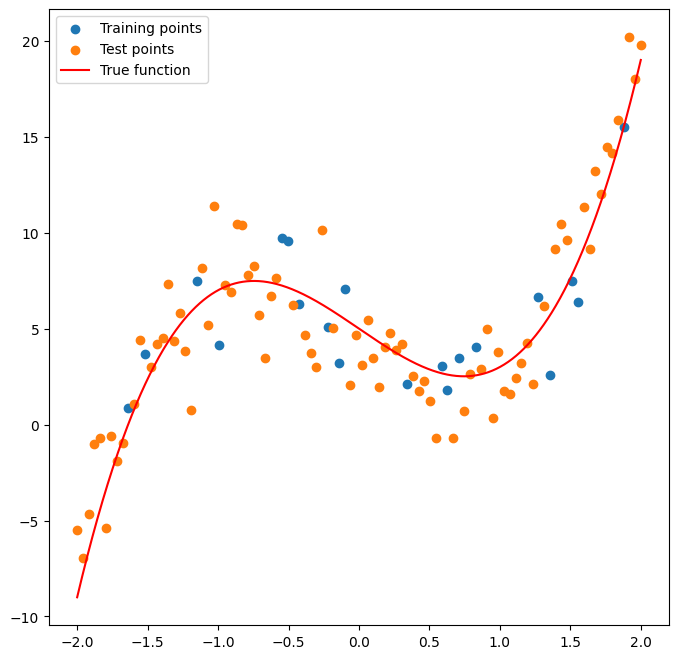

In [3]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

def f(X, noise_rate: float = 0):
    return 3 * X**3 - 5 * X + 5 + noise_rate * np.random.randn(X.shape[0])

n_samples = 100
X = np.linspace(-2, 2, n_samples)
y = f(X, noise_rate=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, shuffle=True, random_state=0)

fig = plt.figure(figsize=(8, 8))

plt.scatter(X_train, y_train, label="Training points")
plt.scatter(X_test, y_test, label="Test points")

xrange = np.linspace(-2, 2, 1000)
plt.plot(xrange, f(xrange, noise_rate=0), c="r", label="True function")
plt.plot()

plt.legend()
plt.show()

In [4]:
print(X.shape)
print(y.shape)

(100,)
(100,)


Fit your model to the training data and visualize the predictions on the same plot with the data points. Report the mean squared error on the training and test data.

Training MSE: 38.40402189955796
Test MSE: 46.308954419947966


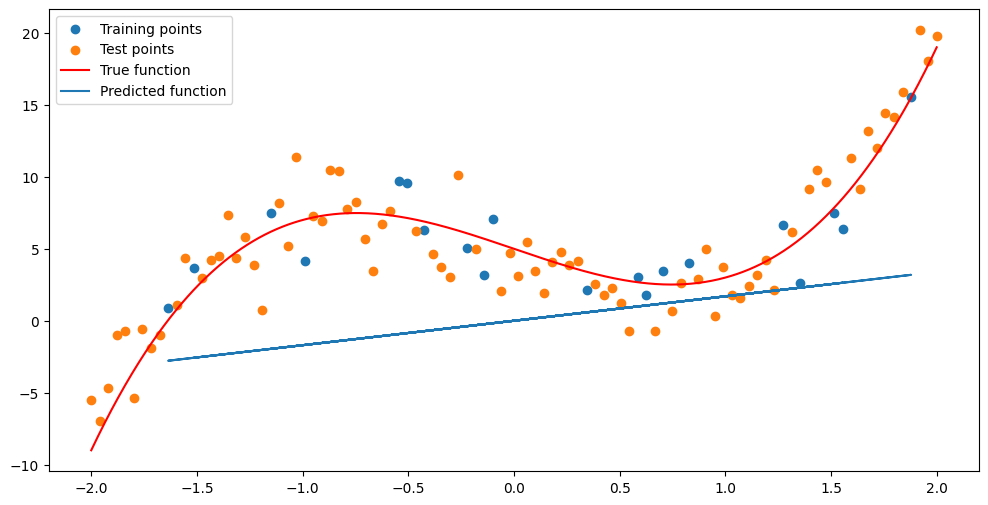

In [5]:
### BEGIN Solution
model = LeastSquares()
model.fit(X_train.reshape(-1,1), y_train)
y_train_pred = model.predict(X_train.reshape(-1,1))
y_test_pred = model.predict(X_test.reshape(-1,1))

mse_train = model.score(X_train.reshape(-1,1), y_train)
mse_test = model.score(X_test.reshape(-1,1), y_test)
print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")

plt.scatter(X_train, y_train, label="Training points")
plt.scatter(X_test, y_test, label="Test points")
plt.plot(xrange, f(xrange, noise_rate=0), c="r", label="True function")
plt.plot(X_train, y_train_pred, label="Predicted function")
plt.legend()
plt.show()

### END Solution

You may notice that the prediction is far from being accurate. In this example the features are 1-dimensional. So the hypothesis function has the form $\theta x$, where both $\theta$ and $x$ are real numbers. Hence, the regression line has to go through the point (0, 0), which leads to inaccuracies, when $y$ is biased, as in the example above. To overcome this, a common practice is to add an additional column of 1s to the data matrix $\mathbf{X}$. This will model the intercept of the regression line.

Implement this and visualize/report the results.

Training MSE: 10.505999757669576
Test MSE: 23.22236447840643


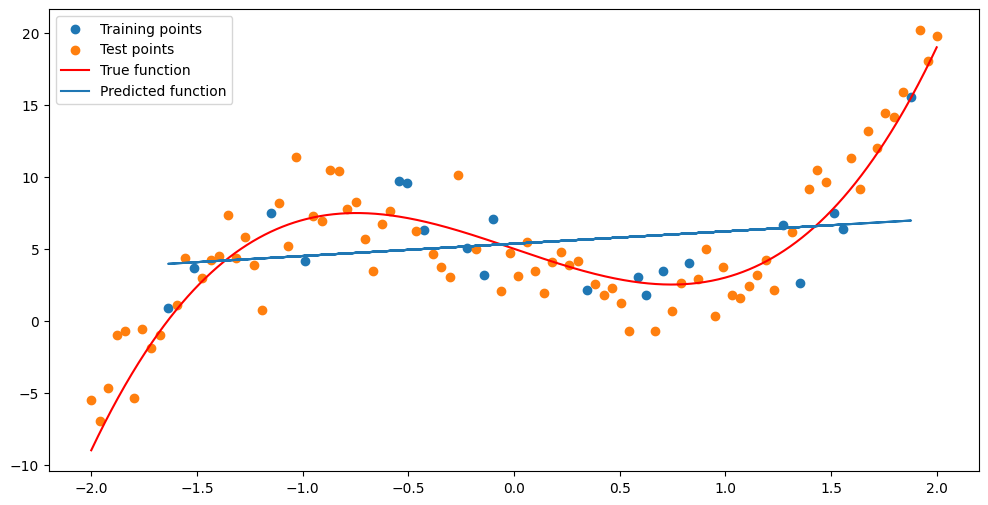

In [6]:
### BEGIN Solution
class LeastSquares(object):
    def __init__(self):
        self.coef_ = None
        
    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        :param X: array of shape (m, d)
        :param y: array of shape (m,)
        """
        ### BEGIN Solution
        X_bias = np.hstack([np.ones((X.shape[0], 1)), X]) # add bias column to X
        self.coef_ = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y # calculate coefficients
        ### END Solution
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        :param X: array of shape (m, d)
        :return: array of shape (m,)
        """
        assert self.coef_ is not None, "Fit the model first!"
        
        ### BEGIN Solution
        X_bias = np.hstack([np.ones((X.shape[0], 1)), X]) 
        predictions = X_bias @ self.coef_
        ### END Solution
        
        assert predictions.shape == (X.shape[0],), "Check shapes!"
        
        return predictions
    
    def score(self, X: np.ndarray, y: np.ndarray) -> np.float64:
        """
        Calculates mean squared error.
        
        :param x: array of shape (m, d)
        :param y: array of shape (m,)
        :return: single number
        """
        ### BEGIN Solution
        predictions = self.predict(X)
        mse = np.mean((y - predictions)**2)
        ### END Solution
        return mse
    
model = LeastSquares()
model.fit(X_train.reshape(-1,1), y_train)
y_train_pred = model.predict(X_train.reshape(-1,1))
y_test_pred = model.predict(X_test.reshape(-1,1))

mse_train = model.score(X_train.reshape(-1,1), y_train)
mse_test = model.score(X_test.reshape(-1,1), y_test)
print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")

plt.scatter(X_train, y_train, label="Training points")
plt.scatter(X_test, y_test, label="Test points")
plt.plot(xrange, f(xrange, noise_rate=0), c="r", label="True function")
plt.plot(X_train, y_train_pred, label="Predicted function")
plt.legend()
plt.show()
### END Solution

# Locally Weighted Linear Regression

As you may observe in the previous task, linear models have difficulties with fitting non-linear functions. One way to overcome this could be to consider non-linear modifications of the original features in the model. We will leave this for later. Another way is to do Locally Weighted Regression (LWR). 

In LWR a separate regression is fitted and used to predict the outcome at each query poins. The training examples are weighted according to their similarity to the query point (in the simplest form, the distance to the query point is used). That is, for a data point $\mathbf{x}_0 \in \mathbb{R}^d$ the prediction is given by:

$$
\hat y_0 = \theta^*(\mathbf{x}_0)^\top \mathbf{x}_0
$$

where

$$
\theta^*(\mathbf{x}_0) = \arg \min_{\theta(\mathbf{x}_0)} \sum_{i = 1}^m w^{(i)}(\mathbf{x}_0) \left(y_i - \theta(\mathbf{x}_0)^\top \mathbf{x}_i\right)^2
$$

Let $W(\mathbf{x}_0)$ be a $m\times m$ diagonal matrix with $w^{(i)}(\mathbf{x}_0)$ on the $i$-th diagonal element. Then under the same assumptions as for LMS a closed form solution can be derived for $\hat y_0$.

$$
\hat y_0 = \mathbf{x}_0^\top (\mathbf{X}^\top W(\mathbf{x}_0) \mathbf{X})^{-1} X^\top W(\mathbf{x}_0) \mathbf{y}
$$

## Task 3. Implement LWR [15 points]

In this task you need to implement a class that preforms Locally Weighted Linear Regression. As the model is fitted again for every new query point, the `fit` method only needs to memorise the dataset. You are asked to implement 3 methods: kernel, predict_ and score. `kernel` constructs the $W(\mathbf{x}_0)$ matrix. Let's consider a specific kernel here, that is given by:

$$
w^{(i)}(\mathbf{x}_0) = \exp\left(- \frac{\|\mathbf{x}_0 - \mathbf{x}_i\|^2}{2 \tau^2}\right)
$$

`predict_` performs prediction for a single data sample. `score`, as before, calculates the mean squared error.

In [7]:
class LocalLeastSquares(object):
    def __init__(self, tau: float):
        self.tau_ = tau
        
        self.X_ = None
        self.y_ = None
        
        self.coef_ = None
        
    def kernel(self, x: np.ndarray) -> np.ndarray:
        """
        :param x: array of shape (d,)
        :return: array of shape (m, m)
        """
        ### BEGIN Solution
        m = self.X_.shape[0]
        W = np.zeros((m, m))
        for i in range(m):
            W[i, i] = np.exp(-np.linalg.norm(x - self.X_[i]) ** 2 / (2 * self.tau_ ** 2))
        return W
        ### END Solution
        
    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        :param X: array of shape (m, d)
        :param y: array of shape (m,)
        """
        
        self.X_ = X
        self.y_ = y
                
    def predict_(self, x: np.ndarray) -> np.float64:
        """
        :param x: array of shape (d,)
        :return: single number, prediction at x
        """
        ### BEGIN Solution
        W = self.kernel(x)
        X_bias = np.hstack([np.ones((self.X_.shape[0], 1)), self.X_])
        self.coef_ = np.linalg.inv(X_bias.T @ W @ X_bias) @ X_bias.T @ W @ self.y_
        return x @ self.coef_[1:] + self.coef_[0]
        ### END Solution
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        :param X: array of shape (m, d)
        :return: array of shape (m,)
        """
        
        return np.array([self.predict_(x) for x in X])
        
    def score(self, X, y):
        """
        Calculates mean squared error.
        
        :param X: array of shape (m, d)
        :param y: array of shape (m,)
        :return: single number
        """
        ### BEGIN Solution
        predictions = self.predict(X)
        mse = np.mean((y - predictions)**2)
        return mse
        ### END Solution

Visualize the resulting regression line along with the data points and train/test MSE, as done in the previous examples.

For tau=0.2:
Training MSE: 1.6816323214674498
Test MSE: 5.0631050172479535
--------------------
For tau=1.1:
Training MSE: 7.968152023081086
Test MSE: 18.449425613379226
--------------------


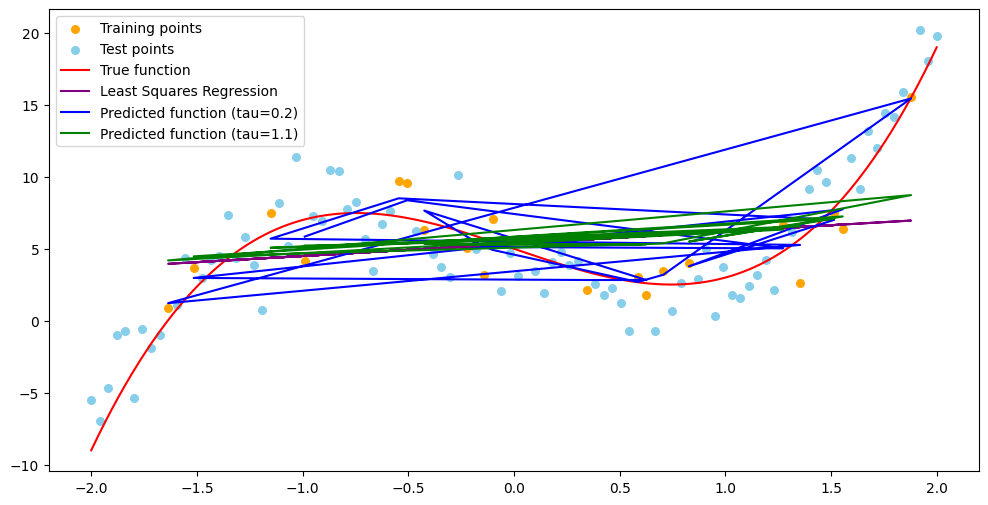

In [8]:
### BEGIN Solution
taus = [0.2, 1.1]
colors = ['blue', 'green']

plt.scatter(X_train, y_train, label="Training points", s=30, c='orange')
plt.scatter(X_test, y_test, label="Test points", s=30, c='skyblue')
plt.plot(xrange, f(xrange, noise_rate=0), c="r", label="True function")

# Plot for standard least squares regression
reg_model = LeastSquares()
reg_model.fit(X_train.reshape(-1,1), y_train)
y_reg_pred = reg_model.predict(X_train.reshape(-1,1))
plt.plot(X_train, y_reg_pred, color='purple', label="Least Squares Regression")

for tau, color in zip(taus, colors):
    model = LocalLeastSquares(tau)
    model.fit(X_train.reshape(-1,1), y_train)
    y_train_pred = model.predict(X_train.reshape(-1,1))
    mse_train = model.score(X_train.reshape(-1,1), y_train)
    mse_test = model.score(X_test.reshape(-1,1), y_test)

    plt.plot(X_train, y_train_pred, color=color, label=f"Predicted function (tau={tau})")

    print(f"For tau={tau}:")
    print(f"Training MSE: {mse_train}")
    print(f"Test MSE: {mse_test}")
    print("--------------------")

plt.legend()
plt.show()
### END Solution

for tau=0.2 (small) high overfitting! you can also see multiple wiggles and different slopes which are idnicating that  model has high variance -> so is sensitive to small changes in the input data and can produce very different outputs

for higher tau for less overfitting and smoother fit to generalize new (test) data

## Task 4. Tune the hyperparameters [7 points]

$\tau$ is an important hyperparameter that can regulate overfitting of the method. Choose an optimal value of $\tau$ in order to minimize the residual sum of squares on the left out data.

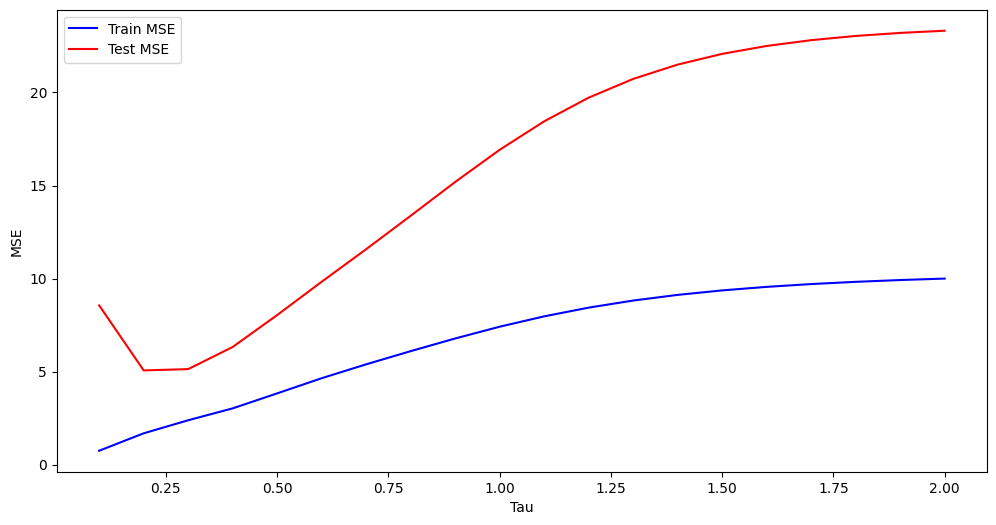

Optimal tau: 0.2


In [9]:
### BEGIN Solution
tau_values = np.linspace(0.1, 2.0, 20) # tau values to try
train_errors = []
test_errors = []

for tau in tau_values:
    model = LocalLeastSquares(tau)
    model.fit(X_train.reshape(-1, 1), y_train)
    mse_train = model.score(X_train.reshape(-1, 1), y_train)
    mse_test = model.score(X_test.reshape(-1, 1), y_test)
    train_errors.append(mse_train)
    test_errors.append(mse_test)


plt.plot(tau_values, train_errors, label="Train MSE", color="blue")
plt.plot(tau_values, test_errors, label="Test MSE", color="red")
plt.xlabel("Tau")
plt.ylabel("MSE")
plt.legend()
plt.show()
optimal_tau = tau_values[np.argmin(test_errors)]
print(f"Optimal tau: {optimal_tau}")

### END Solution

What is the effect of different values for $\tau$?

In the plot shown above we see MSE changes across different tau values for test/train data. 
The effect of differetn tau's are:
- small tau (until 0.25): overfitting train data (blue line) -> low train MSE  -> high test MSE = poor generalization on unseen data! 
- around 0.75: both MSE increasing but still low -> good bias-variance trade-off  (balance of fitting train data - and test generalization)
- large tau > 1.0: with growing tau - MSE test increases -> underfitting (test MSE also platoes also model performanace on unseen data worsens) model becomes simple and unable to capture underlying patterns 


What are advantages/disadvantages of the LWR method?

Advantages:
- flexible: model fits more functions compared to ordinary LS regression since it gives different fit for each point
- adapts locally by the weighting  nearby points more - therefore it sees local structures in the data.
- less assumptions about shape of function: LWR needs less assumptiona bout shape of function being estimated

Disadvantages:
- overfitting: as we see small tau -> model overfits to training data -> model does well on traing data but not good unseen data 
- computationally expensive: for every prediction, it needs to compute weights for each data point!!!!! 
- sensitive to tau: parameter tuning for tau necessairy - choice of tau can lead to over/under fitting

# Logistic Regression

Now let's consider **classification** task. In the **binary classification** problem objects (feature vectors) $\mathbf{x}_{1}, \dots, \mathbf{x}_{m} \in \mathbb{R}^d$ have binary labels $y_{1}, \dots, y_{m} \in \{0, 1\}$.

Using a **linear combination** of the features $\mathbf{\theta}^\top \mathbf{x}$, like in Least Mean Squares, will result in an unbounded estimator. However, we would like to have a mapping $f_{\mathbf{\theta}}: \mathbb{R}^d \to \{0, 1\}$, the output of which can be naturally interpreted as the probability of belonging to class 1.

In **Logistic Regression** the resulting dot-product $\mathbf{\theta}^\top \mathbf{x}$ is converted to the unit interval with the **sigmoid** function:

$$g(z) = \frac{1}{1 + e^{-z}}$$

This gives us the hypothesis function:

$$f_{\mathbf{\theta}}(\mathbf{x}) = g(\mathbf{\theta}^{\top}\mathbf{x}) = \frac{1}{1 + e^{-\mathbf{\theta}^{\top}\mathbf{x}}}$$

Now, we only need to set a **threshold** (for example, 0.5) for classifying an object to the 1st class.

## Task 5. Sigmoid [4 points]

Implement and plot the sigmoid function. 

**Important!** Your function should work for inputs of arbitrary shape. The sigmoid should be applied elementwise. The returned array should have the same shape as the input. 

**Important!!** For large negative input, computing the exponent in the sigmoid may result in overflow. Use an alternative form of the sigmoid for the negative entries of the input to deal with this issue.

**Hint:** An alternative form can be obtained by multiplying the nominator and the denominator of the sigmoid by $e^z$.

In [36]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    """
    :param z: array of arbitrary shape
    """
    ### BEGIN Solution
    pos_mask = (z >= 0)
    neg_mask = (z < 0)
    result = np.zeros_like(z, dtype=np.float64)
    result[pos_mask] = 1 / (1 + np.exp(-z[pos_mask]))
    exp_z = np.exp(z[neg_mask])
    result[neg_mask] = exp_z / (1 + exp_z)
    return result
    ### END Solution

In [37]:
# This should not raise a warning
sigmoid(np.array([-1000]))

array([0.])

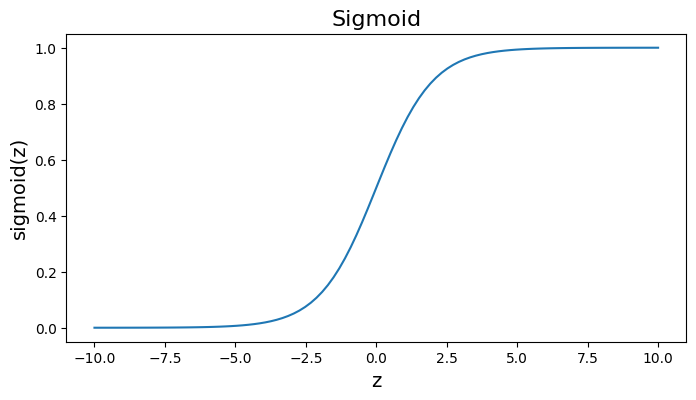

In [38]:
z = np.linspace(-10, 10, 100)

plt.figure(figsize=(8, 4))

### BEGIN Solution
plt.plot(z, sigmoid(z), label="Sigmoid")


### END Solution

plt.title('Sigmoid', size=16)

plt.xlabel('z', size=14)
plt.ylabel('sigmoid(z)', size=14)

plt.show()

Thus, the conditional probabilities of belonging to class 1 or 0 are as follows:

$$\begin{align}
    p(y = 1| \mathbf{x}; \mathbf{\theta}) &= f_{\mathbf{\theta}}(\mathbf{x}) \\
    p(y = 0| \mathbf{x}; \mathbf{\theta}) &= 1 - f_{\mathbf{\theta}}(\mathbf{x})
\end{align}$$

Or one could rewrite it as:

$$p(y| \mathbf{x}; \mathbf{\theta}) = f_{\mathbf{\theta}}(\mathbf{x})^{y}\bigl[1 - f_{\mathbf{\theta}}(\mathbf{x})\bigr]^{1 - y}$$

&nbsp;

Now, to **estimate** the weights $\mathbf{\theta}$, we will **maximize** the **likelihood** function (more precisely, its logarithm for simpler calculations). Therefore, this method is called the **maximum likelihood estimation** (MLE).

$$\ln{\mathcal{L}(\mathbf{\theta})} = \mathcal{l}(\mathbf{\theta}) = \sum\limits_{i = 1}^m p(y_i| \mathbf{x}_i; \mathbf{\theta}) = \sum\limits_{i = 1}^m y_i \ln{\bigl[f_{\mathbf{\theta}}(\mathbf{x}_i) \bigr]} + (1 - y_i)\ln{\bigl[1 - f_{\mathbf{\theta}}(\mathbf{x}_i) \bigr]} \to \max\limits_{\mathbf{\theta}}$$

## Task 6. Log-Likelihood [3 points]

Let $\mathbf{X} = \begin{bmatrix} \mathbf{x}_1^{\top} \\ \vdots \\ \mathbf{x}_m^{\top} \end{bmatrix} \in \mathbb{R}^{m \times d}$ be the data matrix, $\mathbf{y} = \begin{bmatrix} y_1 \\ \vdots \\ y_m \end{bmatrix} \in \mathbb{R}^{m}$ be the labels vector corresponding to $\mathbf{X}$ and $\mathbf{\theta} = \begin{bmatrix} \theta_1 \\ \vdots \\ \theta_d \end{bmatrix} \in \mathbb{R}^{d}$ be the parameters vector.

Implement the log-likelihood for Logistic Regression.

**Note:** You have already implemented the sigmoid function. Now it is time to use it.

In [39]:
def log_likelihood_log_reg(theta, X, y):
    ### BEGIN Solution
    return np.sum(y * np.log(sigmoid(X @ theta)) + (1 - y) * np.log(1 - sigmoid(X @ theta)))

    
    ### END Solution

In [40]:
m = 100
d = 2

X = np.random.randint(low=-10, high=10, size=(m, d))
y = np.random.randint(low=0, high=1, size=(m, 1))
theta = np.zeros((d, 1))

assert np.allclose(log_likelihood_log_reg(theta, X, y),
                   -m * np.log(2),
                   atol=1e-8), "Houston, we have a problem!"
print("Well done!")

Well done!


## Task 7. Gradient Descent [8 points]

Now, to find the weights $\mathbf{\theta}$, we need to solve the optimization problem described above. Let's use [**gradient descent**](https://en.wikipedia.org/wiki/Gradient_descent).

Since the gradient descent solves the **minimization** problem, we will change the maximization problem described above to the minimization problem by changing the sign of the log-likelihood function to negative:

$$\mathcal{l}(\mathbf{\theta}) \to \max\limits_{\mathbf{\theta}} \Longleftrightarrow -\mathcal{l}(\mathbf{\theta}) \to \min\limits_{\mathbf{\theta}}$$

So, let's first implement a function to compute the gradient of the **negative** log-likelihood function.

The gradient is a column vector that has **the same shape as** $\mathbf{\theta}$.

In [41]:
def negative_gradient_log_reg(theta, X, y):
    ### BEGIN Solution
    return -X.T @ (y - sigmoid(X @ theta))
    
    ### END Solution

Now implement the general gradient descent algorithm.

In [44]:
def gradient_descent(X, y, gradient, theta_0, alpha=0.01, tolerance=1e-8, max_iters_number=100):
    """
    X: data matrix of shape [m, d]
    y: labels of shape [m]
    gradient: a function to compute the gradient of the neg. log-likelihood
    theta_0: initialization of theta of shape [d]
    alpha: learning rate
    tolerance: a value to detect convergence (if the norm of the update is smaller that tolerance, terminate)
    max_iters_number: maximum number of iterations of the algorithm
    
    return: the final estimation for theta
    """
    if y.ndim == 1:
        y = y[:, np.newaxis]
    
    if theta_0.ndim == 1:
        theta_0 = theta_0[:, np.newaxis]
    
    ### BEGIN Solution
    theta = theta_0
    for i in range(max_iters_number):
        theta_new = theta - alpha * gradient(theta, X, y)
        if np.linalg.norm(theta_new - theta) < tolerance:
            break
        theta = theta_new
    return theta

    
    ### END Solution

## Task 8. Classifier [10 points]

Let's create our own classifier class and then compare it with the [existing method in the sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

We need to implement three principal methods:

* `fit` to find the coefficients (weights) $\mathbf{\theta}$


* `predict` to predict the labels $\mathbf{\hat{y}}$ for the data matrix $\mathbf{X}$


* `score` to evaluate predictions (for example, with **mean accuracy** score)

In [45]:
def accuracy_score(predictions, labels):
    """
    Returns the accuracy of predictions when compared to the true labels
    """
    assert predictions.shape == labels.shape, "Check shapes!"
    ### BEGIN Solution
    return np.mean(predictions == labels)

    
    ### END Solution

In [46]:
class LogReg(object):
    def __init__(self):
        self.coef_ = None
        
    def fit(self, X, y):
        ### BEGIN Solution
        X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        theta_0 = np.zeros((X_bias.shape[1], 1))
        theta = gradient_descent(X_bias, y, negative_gradient_log_reg, theta_0)
        self.coef_ = theta[1:]
        self.intercept_ = theta[0]

        
        ### END Solution
        
    def predict(self, X, threshold=0.5):
        ### BEGIN Solution
        X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        predictions = sigmoid(X_bias @ np.vstack([self.intercept_, self.coef_]))
        predictions[predictions >= threshold] = 1
        predictions[predictions < threshold] = 0
        return predictions.flatten() 
        
        ### END Solution
        
        assert predictions.shape == (X.shape[0],), "Check shapes!"
        
        return predictions
    
    def score(self, X, y):
        ### BEGIN Solution
        predictions = self.predict(X)
        return accuracy_score(predictions, y)
        
        ### END Solution

## Task 9. Decision Rule [6 points]

In this task, your goal is to visualize the **decision rule** of **Logistic Regression** applied to a synthetic $2$-dimensional dataset generated by a built-in `sklearn.datasets` method called `make_moons`. In the cell below we generate the dataset.

In [47]:
from sklearn.datasets import make_moons

In [48]:
X, y = make_moons(n_samples=300, noise=0.2, random_state=0)
print(X.shape, y.shape)

(300, 2) (300,)


The goal is to fit our LogReg and sklearn's Logistic Regreesion classifiers to this data:

You have to plot the decision regions. The plots must have **titles**, which contain the names of the classifiers and the corresponding accuracy (rounded to only **two** decimal places).

You can write the plotting code on your own, but we highly recommend just to use [mlxtend](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) library (`pip install mlxtend`), which has a awesome one-line decision boundary plotting function.

In [49]:
from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_decision_regions

In [50]:
my_logistic_regression = LogReg()
logistic_regression = LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1)

classifiers = [my_logistic_regression, logistic_regression]

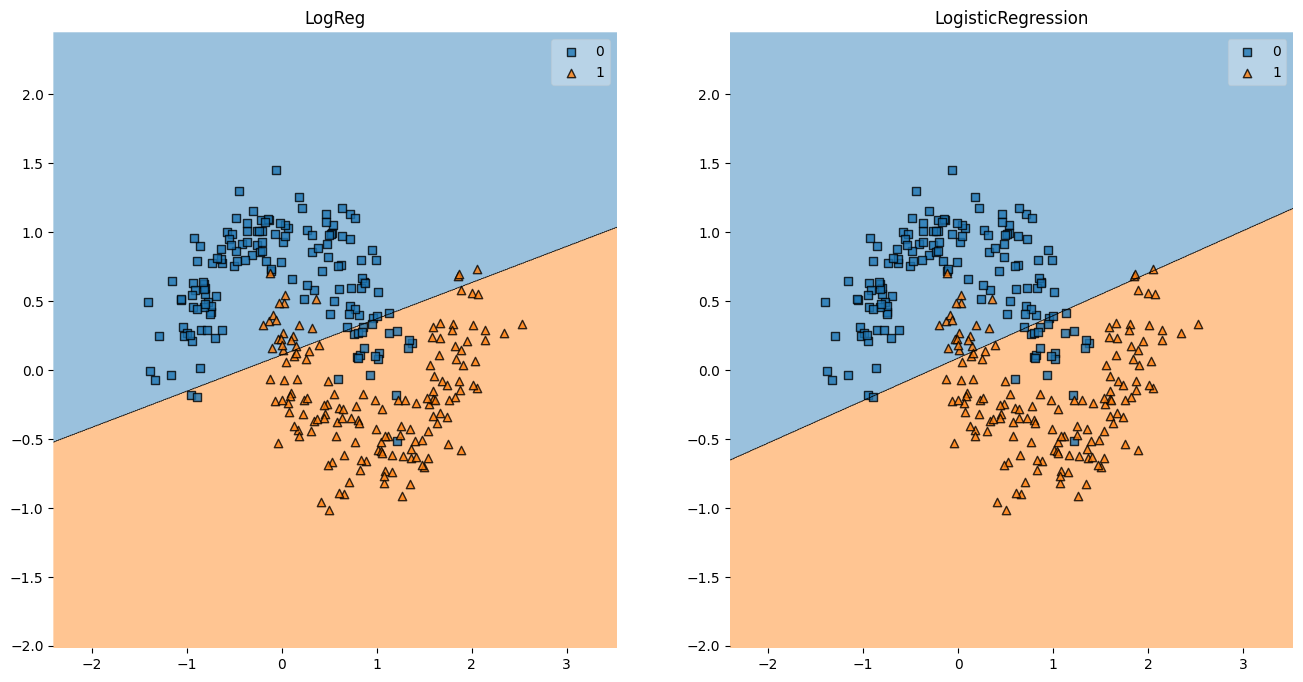

In [51]:
# plotting

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))

for classifier, axis in zip(classifiers, axes.flat):
    ### BEGIN Solution
    classifier.fit(X, y)
    plot_decision_regions(X, y, clf=classifier, ax=axis)
    axis.set_title(classifier.__class__.__name__)

    ### END Solution

## Task 10. Feature Engineering [7 points]

In the previous task, classifiers obviously failed fitting to data. This happened because the decision boundary of the classifier has a restricted linear form, while the data is much more complicated.

One may try to change the parameters of the classifier in order to improve accuracy, but linear models do not have parameters that can change the form of the decision rule.

In this case, the **feature engineering** helps: one may try to compute new (e.g. non-linear) features based on the existing ones and fit the classifier for the new features. This may help low-complexity classifiers to fit complex data dependencies.

Your task is

* to achieve accuracy $> 0.95$, by generating additional features (e.g. polynomial),


* to plot decision rules in the original feature space,


* to write 2-3 sentences about why you chose these features.

It is your choice how to generate features. You may create hand-crafted features and add them manually.

Nevertheless, we **highly recommend** getting used to and applying the following built-in `sklearn` methods, for example:

* `PolynomialFeatures` for [feature generation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

* `StandardScaler`for [feature scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

* `Pipeline` - for [combining several operations](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) in a row (e.g. feature creation & prediction)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [53]:
logistic_regression_simple = Pipeline([('LR', LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1))])

### BEGIN Solution
logistic_regression_advanced = Pipeline([('poly', PolynomialFeatures(degree=5)), ('LR', LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1))])



### END Solution

classifiers = [logistic_regression_simple, logistic_regression_advanced]

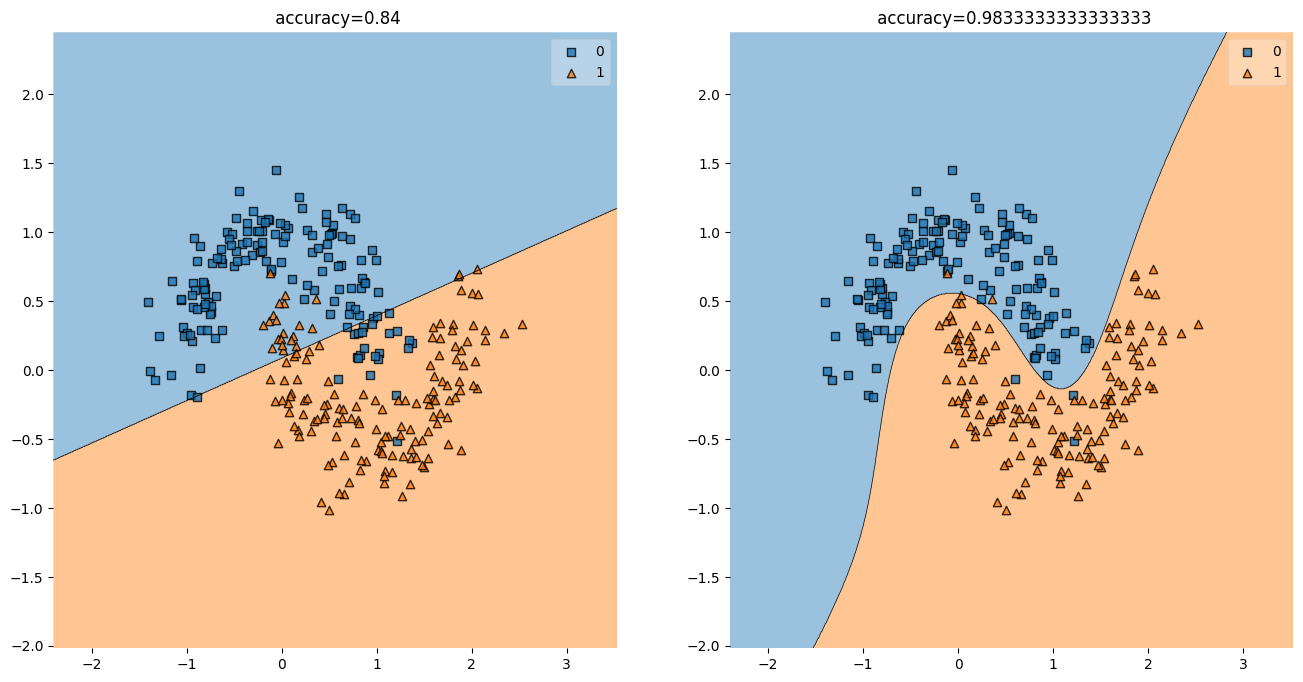

In [54]:
# plotting
classifiers = [logistic_regression_simple, logistic_regression_advanced] # add your models here
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))

for classifier, axis in zip(classifiers, axes.flat):
    ### BEGIN Solution
    classifier.fit(X, y)
    plot_decision_regions(X, y, clf=classifier, ax=axis)
    
    # ACCURACY
    predictions = classifier.predict(X)
    accuracy = accuracy_score(predictions, y)
    axis.set_title(f" accuracy={accuracy}")
    ### END Solution

Why did you choose these features?
- I used polynomial features (degree 5) because the data is not linearly separable and the polynomial features help to separate the data

# Face classification



In this task you will face a real-life problem of face detection. You have to train a model to classify 24$\times$24 grayscale images to *face*/*non-face* classes.
First, let us import some libraries and load the data.

In [55]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

# Set default parameters for plots
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [56]:
# Load the dataset
data = loadmat('faces.mat')
labels = np.squeeze(data['Labels'])
labels[labels == -1] = 0  # Want labels in {0, 1}
data = data['Data']
data.shape

(19832, 576)

Each datapoint is a 576-dimentional vector that stores pixel intensities of a flattened grayscale image.
If carefully reshaped, one can visualize the datapoints as 24$\times$24 images.

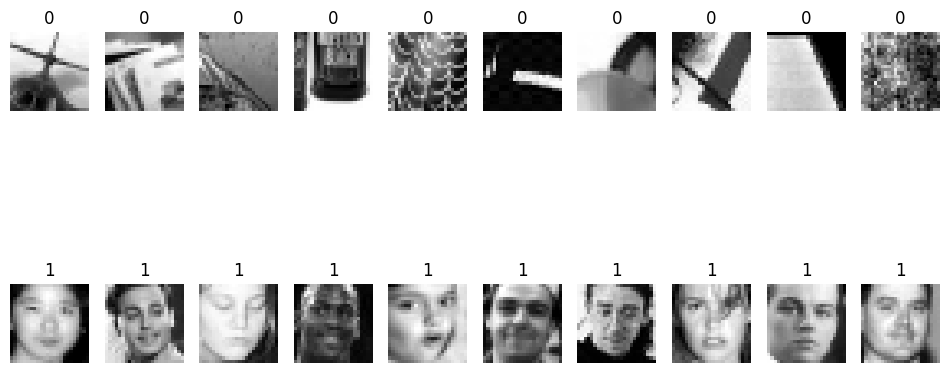

In [57]:
# Visualize some examples from the dataset.
samples_per_class = 10
classes = [0, 1]
imgs = np.reshape(data, [-1, 24, 24], order='F')

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(np.equal(labels, cls))
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = y * samples_per_class + i + 1
        plt.subplot(len(classes), samples_per_class, plt_idx)
        plt.imshow(imgs[idx])
        plt.axis('off')
        plt.title(cls)
plt.show()

Now let us split the dataset into train and test. This will allow to assess the ability of our models to generalize to unseen data.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)
num_train = X_train.shape[0]
num_test = X_test.shape[0]

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (13882, 576)
Training labels shape:  (13882,)
Test data shape:  (5950, 576)
Test labels shape:  (5950,)


## Task 11. Logistic Regression for Face Classification [5 points]

Now fit your *LogReg* class on *(X_train, y_train)* and report the accuracy on both the **train** and **test** sets.

**Warning:** It may take time to fit your model to this amount of data.

In [59]:
### BEGIN Solution
model = LogReg()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print(f"Accuracy: {accuracy}")

### END Solution

Accuracy: 0.874453781512605


Visualize the learned coefficients as a grayscale image. Reshape the coefficients and use *plt.imshow()*.

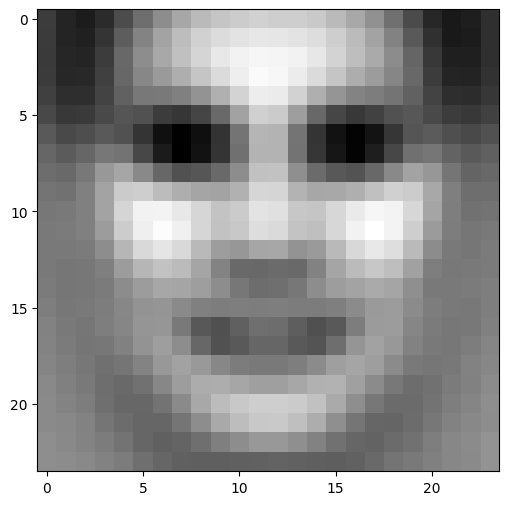

In [60]:
### BEGIN Solution
rotated_coef = np.rot90(model.coef_.reshape(24, 24), k=-1)
plt.imshow(rotated_coef, cmap='gray')
plt.show()
### END Solution

## Task 12. Tuning the model [5 points]

The final task is to build a model that reaches as high accuracy on the test set as possible.
Feel free to use anything that you already know from the lectures/tutorials/this assignment by the time this assignment was given (i.e. the 4th week).

Justify your final choice of the model.

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# 1. Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. PCA
# pca = PCA(n_components=0.95)
# X_train_scaled = pca.fit_transform(X_train_scaled)
# X_test_scaled = pca.transform(X_test_scaled)

# Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier()
}

# Hyperparameters to tune
params = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10, 100]},
    "Decision Tree": {"max_depth": [3, 5, 7, None]},
    "Random Forest": {"n_estimators": [10, 50, 100], "max_depth": [3, 5, 7, None]},
    "SVM": {"C": [0.01, 0.1, 1, 10], "kernel": ['linear', 'rbf']},
    "KNN": {"n_neighbors": [3, 5, 7, 11]}
}

best_models = {}

# Hyperparameter tuning using GridSearchCV
for name, classifier in classifiers.items():
    grid_search = GridSearchCV(classifier, params[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_

# Evaluation
for name, model in best_models.items():
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.2f}%")


C:\Users\Moritz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Moritz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Logistic Regression Accuracy: 0.93%
Decision Tree Accuracy: 0.87%
Random Forest Accuracy: 0.96%
SVM Accuracy: 0.98%
KNN Accuracy: 0.91%


I used a variety of classifiers, including Logistic Regression, Decision Trees, Random Forests, SVM, and k-Nearest Neighbors (KNN). For each classifier, a grid search was conducted to tune hyperparameters to their optimal values, I standardized using the StandardScaler for feature = mean 0 / variance 1 - needing for SVM/KNN (-> also could use PCA for dim. reduciton just uncomment,)

### Result:
- Logistic Regression Accuracy: 0.93%
- Decision Tree Accuracy: 0.88%
- Random Forest Accuracy: 0.96%
- SVM Accuracy: 0.98%
- KNN Accuracy: 0.91%

sVM achieved the highest accuracy of 98%, best-performing model among those tested. SVMs are known for their ability to handle high-dimensional data and find complex decision boundaries. Moreover, the usage of kernel tricks in SVMs allows the algorithm to find non-linear boundaries, which can be highly beneficial if the data distribution is non-linear. Also random forst does a good job - showing the power of multiple decision trees and aggregating their results, Random Forests  achieves better generalization on test data compared to individual decision trees.